### Завдання.
Використовуючи датасет з файлу trayn.csv, побудуйте діаграми розподілу для значень з поля «Age».

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy. stats import norm
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson


#### Загрузка, та підготовка даних.

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
age = np.array(df.Age)
age_clear = age[~np.isnan (age)]
age_clear[:5]

array([22., 38., 26., 35., 35.])

#### Відображення даних.

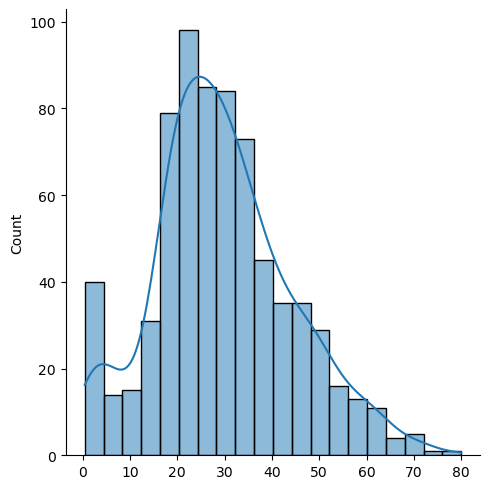

In [4]:
sns.displot (x=age_clear, kde= True) 

#### Перевірка гіпотези, щодо нормальності розподілу характеристики Age.

In [5]:
stat, p = shapiro(age_clear)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.981, p=0.000
Probably not Gaussian


In [6]:
stat, p = normaltest(age_clear)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=18.105, p=0.000
Probably not Gaussian


#### Застосування бібліотеки Fitter, для з'ясування розподілу.

In [8]:
from fitter import Fitter, get_common_distributions, get_distributions

In [21]:
f = Fitter(age_clear,distributions=get_common_distributions())
f.fit()
f.summary()

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 26.74it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.011183,997.757182,-7880.130272,inf,0.056286,0.020855
chi2,0.011215,998.614796,-7878.095589,inf,0.057456,0.017226
gamma,0.011215,998.614708,-7878.095568,inf,0.057456,0.017226
norm,0.011571,1025.691264,-7862.395007,inf,0.064561,0.004963
cauchy,0.011777,1027.107508,-7849.745954,inf,0.091760,0.000011


In [22]:
f.get_best()

{'lognorm': {'s': 0.13424431904602424,
  'loc': -78.02671169181616,
  'scale': 106.78081758772217}}

### Висновок.
Проведені тести дозволяють відхилити гіпотезу про нормальність розподілу властивості Age.
Найбільш відповідним розподілом для Age є логнормальний розподіл.